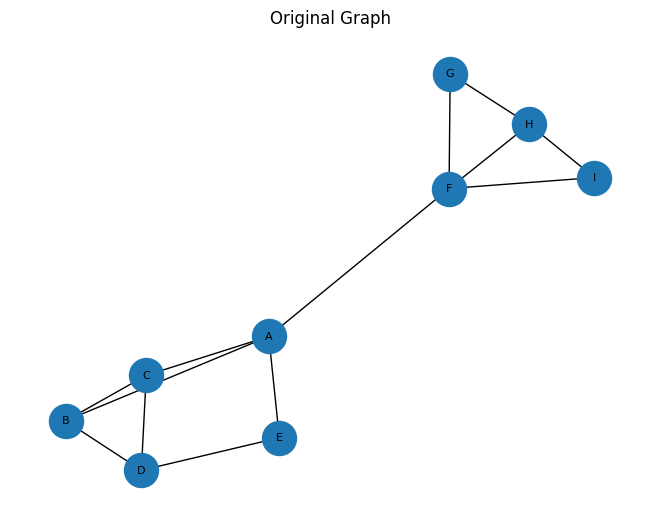

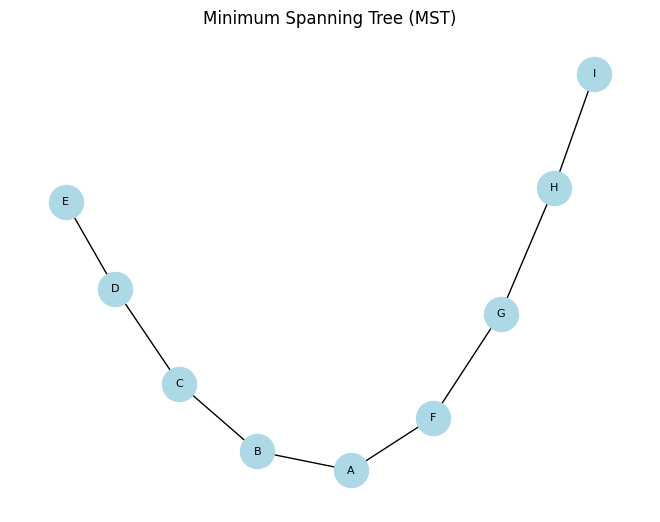

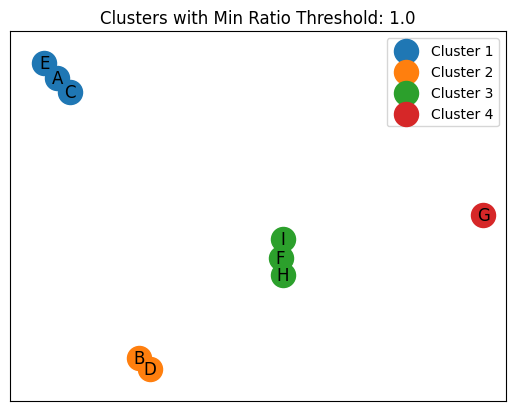

Minimum Intra-Inter Distance Ratio: 1.0
Cluster 1: ['C', 'A', 'E']
Cluster 2: ['B', 'D']
Cluster 3: ['I', 'H', 'F']
Cluster 4: ['G']


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def kruskal_mst(graph):
    mst = nx.minimum_spanning_tree(graph)
    return mst

def calculate_ratio(graph, threshold):
    mst = kruskal_mst(graph)
    original_edges = list(graph.edges)
    edges_to_remove = [(u, v) for u, v, d in mst.edges(data=True) if d['weight'] > threshold]
    graph.remove_edges_from(edges_to_remove)

    cluster_distances = []
    for component in nx.connected_components(graph):
        subgraph = graph.subgraph(component)
        subgraph_edges = list(subgraph.edges)
        cluster_distance = sum(graph[u][v]['weight'] for u, v in subgraph_edges)
        cluster_distances.append(cluster_distance)

    inter_cluster_distance = sum(graph[u][v]['weight'] for u, v in original_edges if (u, v) not in mst.edges)

    ratio = sum(cluster_distances) / inter_cluster_distance

    return ratio

def cluster_and_visualize(graph, step_size):
    threshold_values = []
    ratio_values = []
    max_threshold = max(graph[u][v]['weight'] for u, v in graph.edges)
    threshold = step_size

    while threshold <= max_threshold:
        ratio = calculate_ratio(graph.copy(), threshold)
        threshold_values.append(threshold)
        ratio_values.append(ratio)
        threshold += step_size

    min_ratio = min(ratio_values)
    min_ratio_threshold = threshold_values[ratio_values.index(min_ratio)]

    mst = kruskal_mst(graph)
    edges_to_remove = [(u, v) for u, v, d in mst.edges(data=True) if d['weight'] > min_ratio_threshold]
    graph.remove_edges_from(edges_to_remove)
    clusters = list(nx.connected_components(graph))

    pos_mst = nx.spring_layout(mst)
    nx.draw(mst, pos_mst, with_labels=True, node_color='lightblue', node_size=600, font_size=8)
    plt.title("Minimum Spanning Tree (MST)")
    plt.show()

    pos_clusters = nx.spring_layout(graph)
    for i, cluster in enumerate(clusters):
        nx.draw_networkx_nodes(graph, pos_clusters, nodelist=cluster, node_color=f'C{i}', label=f'Cluster {i+1}')
    nx.draw_networkx_edges(graph, pos_clusters)
    nx.draw_networkx_labels(graph, pos_clusters)
    plt.legend(loc='best')
    plt.title(f'Clusters with Min Ratio Threshold: {min_ratio_threshold}')
    plt.show()

    clustered_data = {}
    for i, cluster in enumerate(clusters):
        clustered_data[f'Cluster {i+1}'] = list(cluster)

    print(f"Minimum Intra-Inter Distance Ratio: {min_ratio}")

    return clustered_data

G = nx.Graph()
G.add_edge('A', 'B', weight=3)
G.add_edge('B', 'C', weight=4)
G.add_edge('C', 'D', weight=5)
G.add_edge('D', 'E', weight=6)
G.add_edge('E', 'A', weight=7)
G.add_edge('A', 'C', weight=8)
G.add_edge('B', 'D', weight=9)
G.add_edge('A', 'F', weight=4)
G.add_edge('F', 'G', weight=5)
G.add_edge('G', 'H', weight=6)
G.add_edge('H', 'I', weight=7)
G.add_edge('I', 'F', weight=8)
G.add_edge('F', 'H', weight=9)

pos_original = nx.spring_layout(G)
nx.draw(G, pos_original, with_labels=True, node_size=600, font_size=8)
plt.title("Original Graph")
plt.show()

step_size = 1.0
clustered_data = cluster_and_visualize(G, step_size)

for cluster_name, cluster in clustered_data.items():
    print(f"{cluster_name}: {cluster}")
